In [ ]:
## Topic  = R Data Science Project – Uber Data Analysis

In [1]:
library(ggplot2)
library(ggthemes)
library(lubridate)
library(dplyr)
library(tidyr)
library(DT)
library(scales)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'ggthemes' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:lubridate':

    intersect, setdiff, union

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'DT' was built under R version 3.6.3"

In [2]:
apr_data <- read.csv("C:/Users/LENOVO/Downloads/uber-raw-data-apr14.csv")
may_data <- read.csv("C:/Users/LENOVO/Downloads/uber-raw-data-may14.csv")
jun_data <- read.csv("C:/Users/LENOVO/Downloads/uber-raw-data-jun14.csv")
jul_data <- read.csv("C:/Users/LENOVO/Downloads/uber-raw-data-jul14.csv")
aug_data <- read.csv("C:/Users/LENOVO/Downloads/uber-raw-data-aug14.csv")
sep_data <- read.csv("C:/Users/LENOVO/Downloads/uber-raw-data-sep14.csv")

In [3]:
colors = c("#CC1011", "#665555", "#05a399", "#cfcaca", "#f5e840", "#0683c9", "#e075b0")

In [4]:
data_2014 <- rbind(apr_data,may_data, jun_data, jul_data, aug_data, sep_data)

In [5]:
data_2014$Date.Time <- as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S")

In [6]:
data_2014$Time <- format(as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S"), format="%H:%M:%S")

In [7]:
data_2014$Date.Time <- ymd_hms(data_2014$Date.Time)

In [8]:
data_2014$day <- factor(day(data_2014$Date.Time))

In [9]:
data_2014$month <- factor(month(data_2014$Date.Time, label = TRUE))

In [10]:
data_2014$year <- factor(year(data_2014$Date.Time))

In [11]:
data_2014$dayofweek <- factor(wday(data_2014$Date.Time, label = TRUE))

In [12]:
data_2014$hour <- factor(hour(hms(data_2014$Time)))
data_2014$minute <- factor(minute(hms(data_2014$Time)))
data_2014$second <- factor(second(hms(data_2014$Time)))

In [13]:
summary(data_2014)

   Date.Time                        Lat             Lon        
 Min.   :2014-04-01 00:00:00   Min.   :39.66   Min.   :-74.93  
 1st Qu.:2014-05-28 15:18:00   1st Qu.:40.72   1st Qu.:-74.00  
 Median :2014-07-17 14:45:00   Median :40.74   Median :-73.98  
 Mean   :2014-07-11 18:50:50   Mean   :40.74   Mean   :-73.97  
 3rd Qu.:2014-08-27 21:55:00   3rd Qu.:40.76   3rd Qu.:-73.97  
 Max.   :2014-09-30 22:59:00   Max.   :42.12   Max.   :-72.07  
                                                               
     Base             Time                day          month        
 B02512: 205673   Length:4534327     30     : 167160   Apr: 564516  
 B02598:1393113   Class :character   12     : 160606   May: 652435  
 B02617:1458853   Mode  :character   16     : 158921   Jun: 663844  
 B02682:1212789                      13     : 156892   Jul: 796121  
 B02764: 263899                      23     : 156032   Aug: 829275  
                                     9      : 155135   Sep:1028136  
     

In [14]:
# Plotting the trips by the hours in a day

In [15]:
hour_data <- data_2014 %>%
           group_by(hour) %>%
               dplyr::summarize(Total = n()) 
datatable(hour_data)

HTML widgets cannot be represented in plain text (need html)

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.


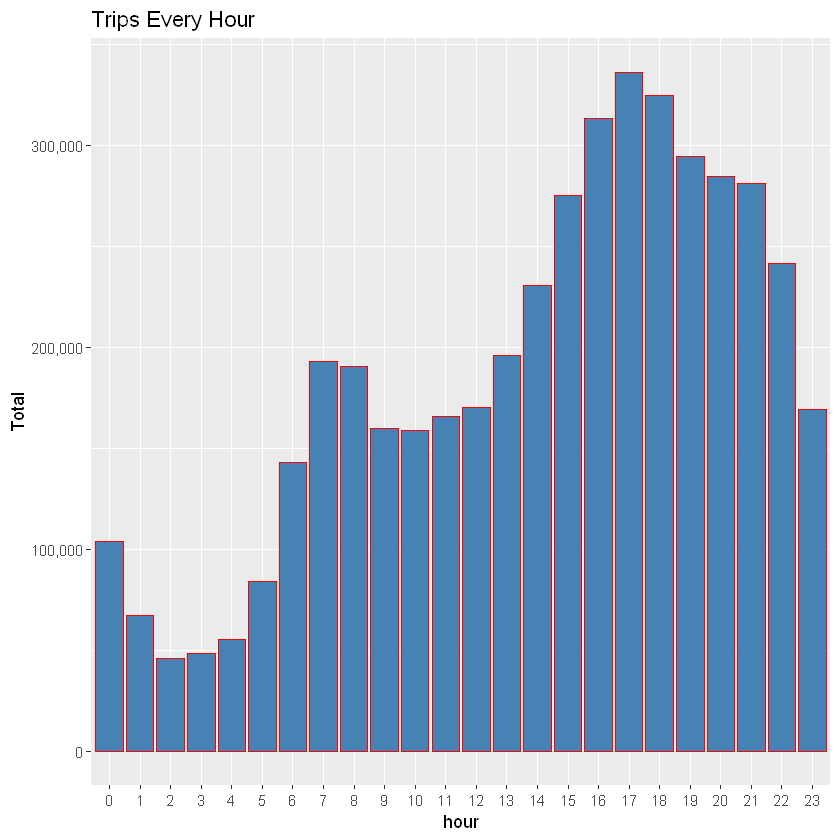

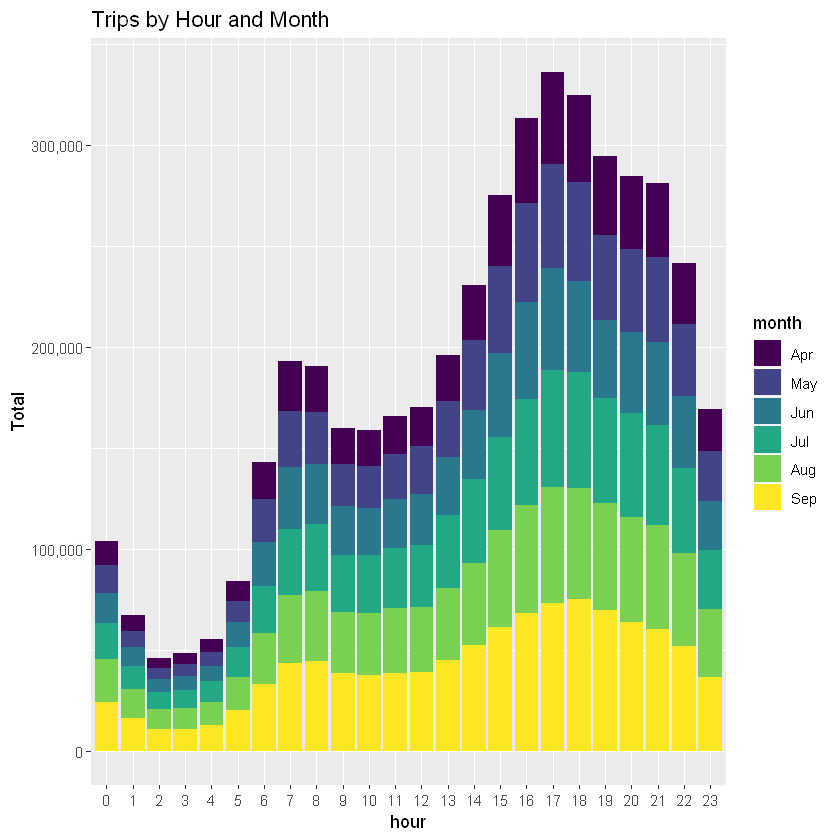

In [16]:
ggplot(hour_data, aes(hour, Total)) + 
        geom_bar( stat = "identity", fill = "steelblue", color = "red") +
           ggtitle("Trips Every Hour") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma)

month_hour <- data_2014 %>%
          group_by(month, hour) %>%
             dplyr::summarize(Total = n())

ggplot(month_hour, aes(hour, Total, fill = month)) + 
       geom_bar( stat = "identity") +
          ggtitle("Trips by Hour and Month") +
           scale_y_continuous(labels = comma)

In [17]:
## Plotting data by trips during every day of the month

In [18]:
day_group <- data_2014 %>%
          group_by(day) %>%
             dplyr::summarize(Total = n()) 
datatable(day_group)

HTML widgets cannot be represented in plain text (need html)

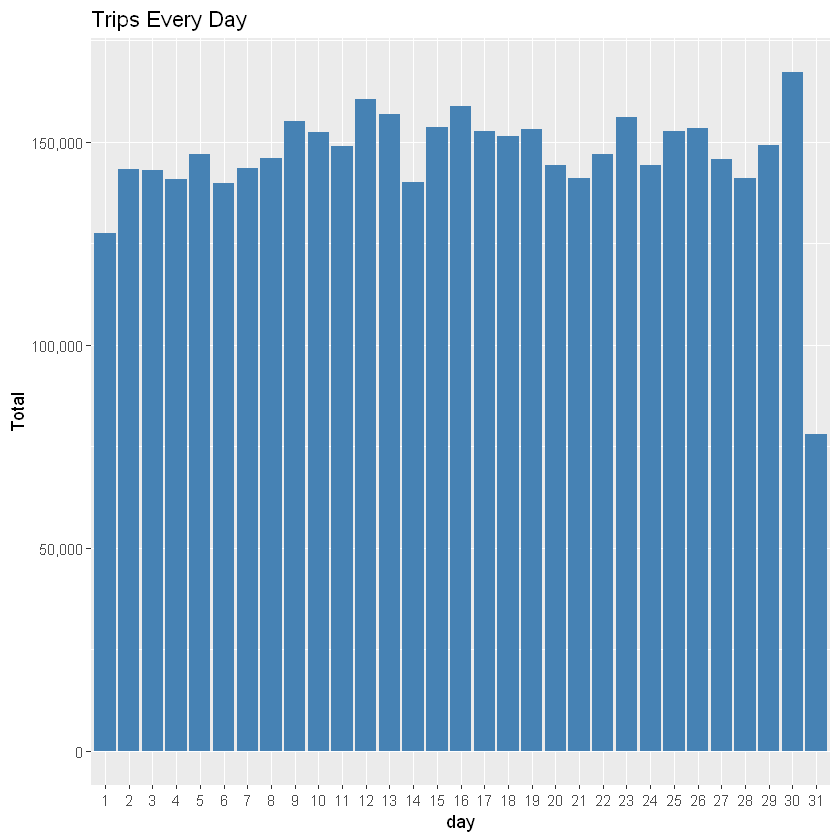

In [19]:
ggplot(day_group, aes(day, Total)) + 
        geom_bar( stat = "identity", fill = "steelblue") +
           ggtitle("Trips Every Day") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma)

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.


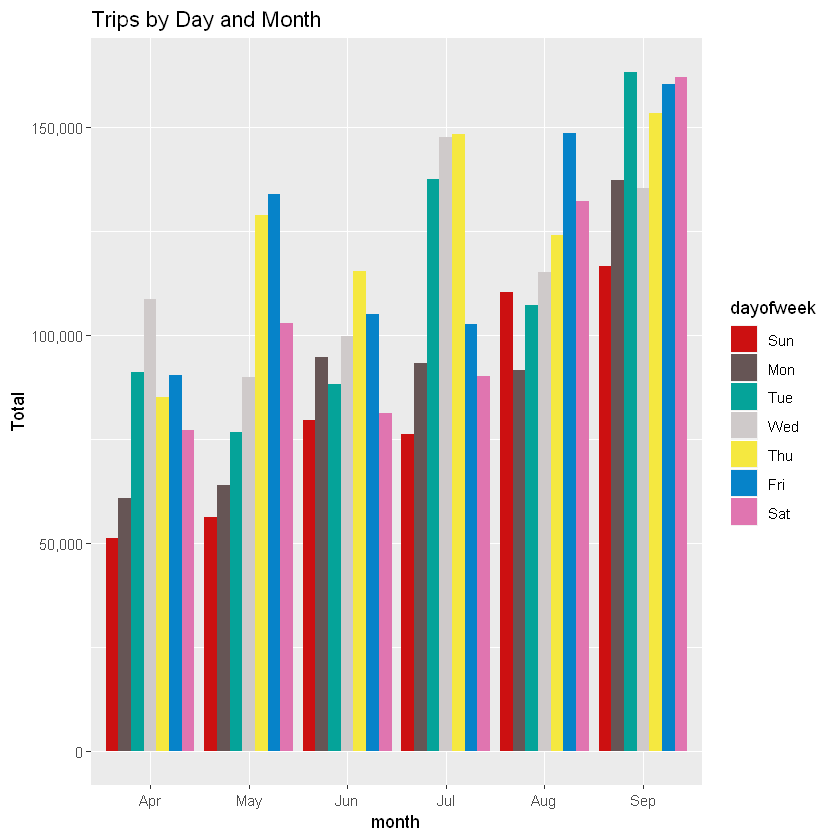

In [20]:
month_weekday <- data_2014 %>%
         group_by(month, dayofweek) %>%
             dplyr::summarize(Total = n())

ggplot(month_weekday, aes(month, Total, fill = dayofweek)) + 
       geom_bar( stat = "identity", position = "dodge") +
          ggtitle("Trips by Day and Month") +
           scale_y_continuous(labels = comma) +
           scale_fill_manual(values = colors)

In [21]:
# Number of Trips taking place during months in a year

In [22]:
month_group <- data_2014 %>%
          group_by(month) %>%
             dplyr::summarize(Total = n()) 
datatable(month_group)

HTML widgets cannot be represented in plain text (need html)

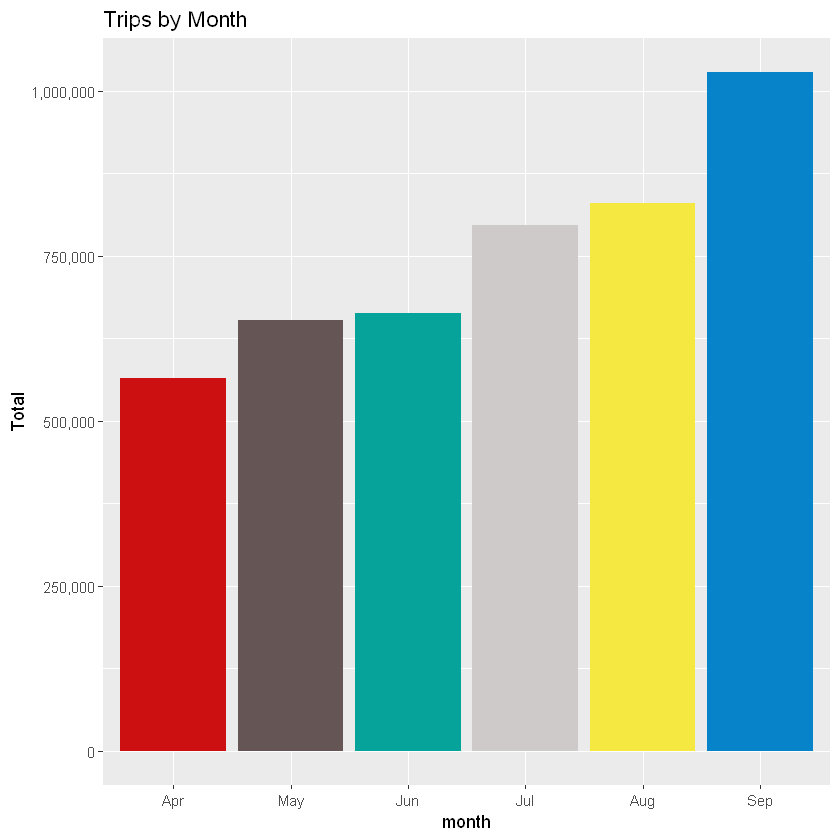

In [23]:
ggplot( month_group, aes(month, Total, fill = month)) + 
        geom_bar( stat = "identity") +
           ggtitle("Trips by Month") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma) +
            scale_fill_manual(values = colors)

In [24]:
## trips by day and month

In [25]:
month_weekday <- data_2014 %>%
         group_by(month, dayofweek) %>%
             dplyr::summarize(Total = n())

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.


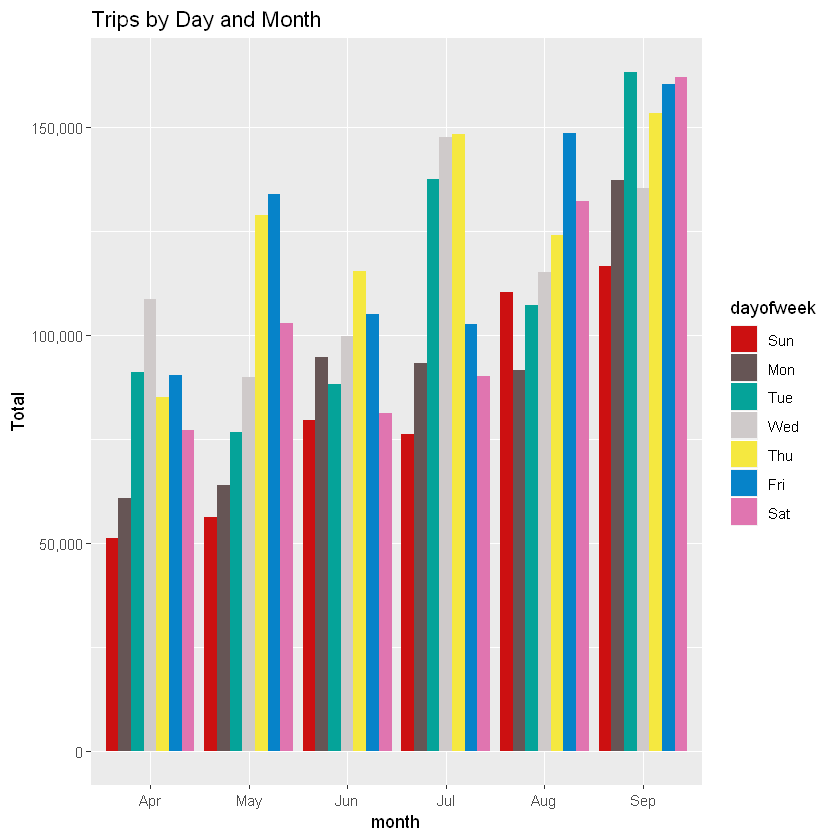

In [26]:
ggplot(month_weekday, aes(month, Total, fill = dayofweek)) + 
       geom_bar( stat = "identity", position = "dodge") +
          ggtitle("Trips by Day and Month") +
           scale_y_continuous(labels = comma) +
           scale_fill_manual(values = colors)

In [27]:
## Finding out the number of Trips by bases

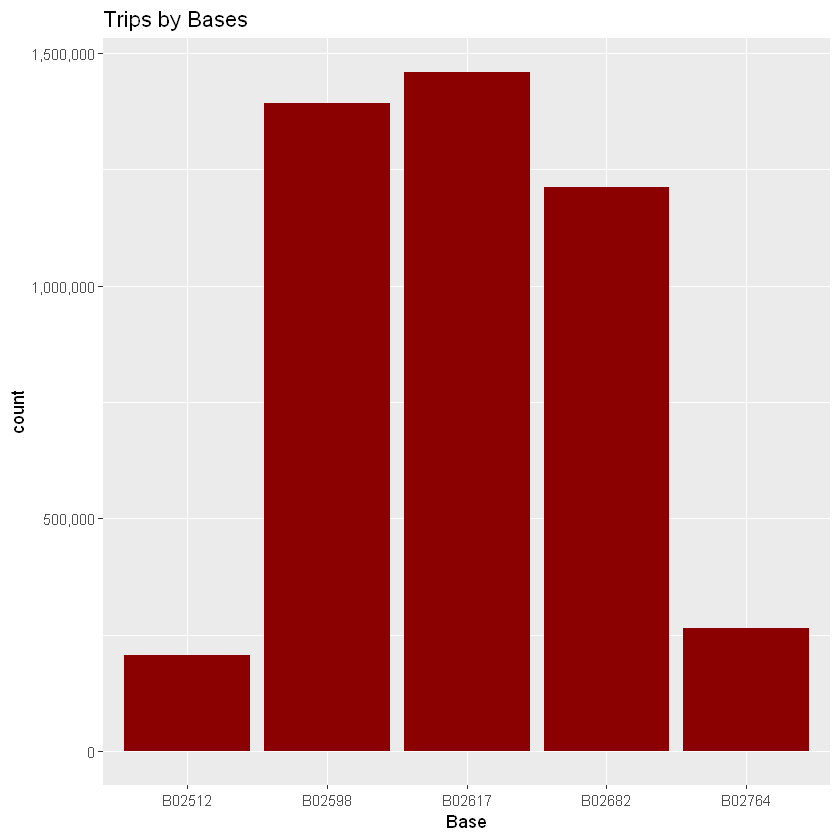

In [28]:
ggplot(data_2014, aes(Base)) + 
 geom_bar(fill = "darkred") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases")

In [29]:
## trips by bases and month

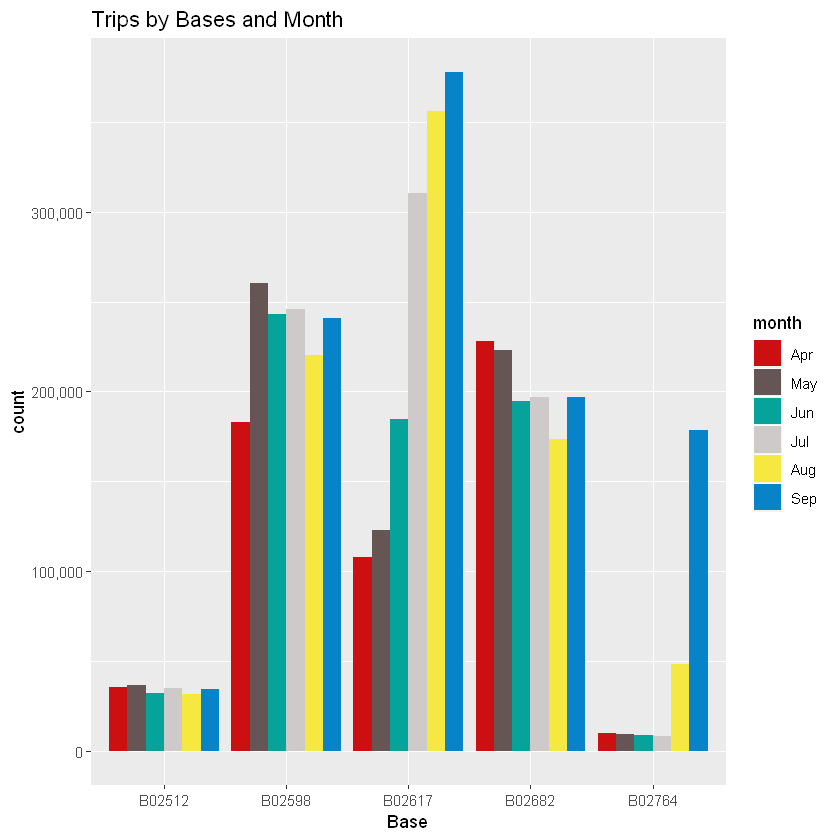

In [30]:
ggplot(data_2014, aes(Base, fill = month)) + 
 geom_bar(position = "dodge") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases and Month") +
 scale_fill_manual(values = colors)

In [31]:
## trips ny bases and day of week

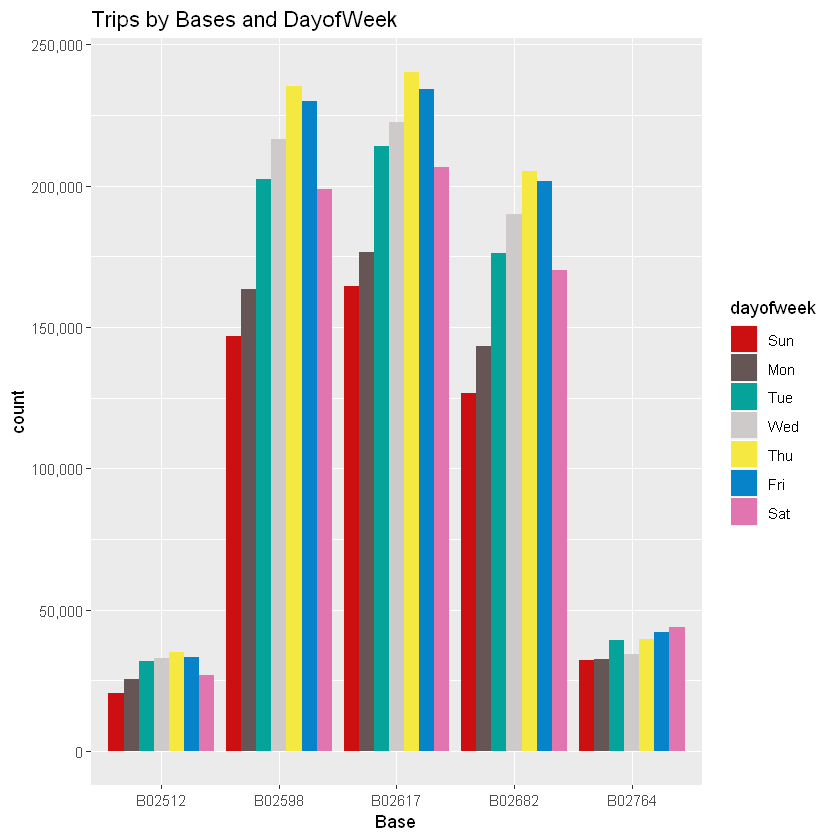

In [32]:
ggplot(data_2014, aes(Base, fill = dayofweek)) + 
 geom_bar(position = "dodge") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases and DayofWeek") +
 scale_fill_manual(values = colors)

In [33]:
## Creating a Heatmap visualization of day, hour and month

In [34]:
# 1.Heatmap by Hour and Day.

In [35]:
day_and_hour <- data_2014 %>%
         group_by(day, hour) %>%
            dplyr::summarize(Total = n())

datatable(day_and_hour)

`summarise()` has grouped output by 'day'. You can override using the `.groups` argument.


HTML widgets cannot be represented in plain text (need html)

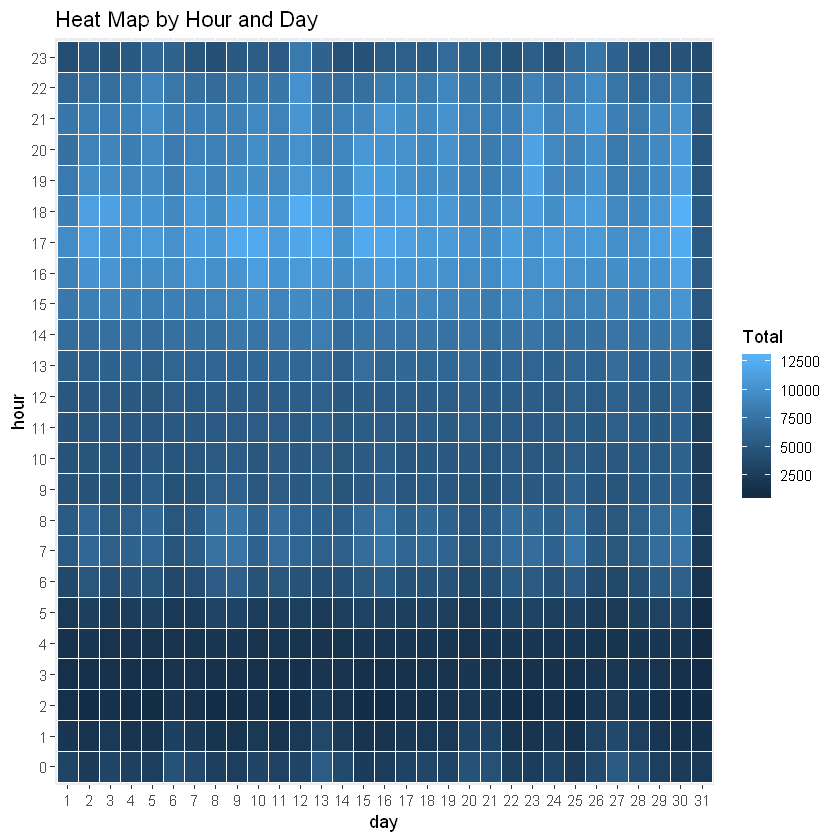

In [36]:
ggplot(day_and_hour, aes(day, hour, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Hour and Day")

In [37]:
# 2. Heatmap by Month and Day.

In [38]:
ggplot(day_month_group, aes(day, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Day")

ERROR: Error in ggplot(day_month_group, aes(day, month, fill = Total)): object 'day_month_group' not found


In [39]:
# 3.Month and Day of the Week.

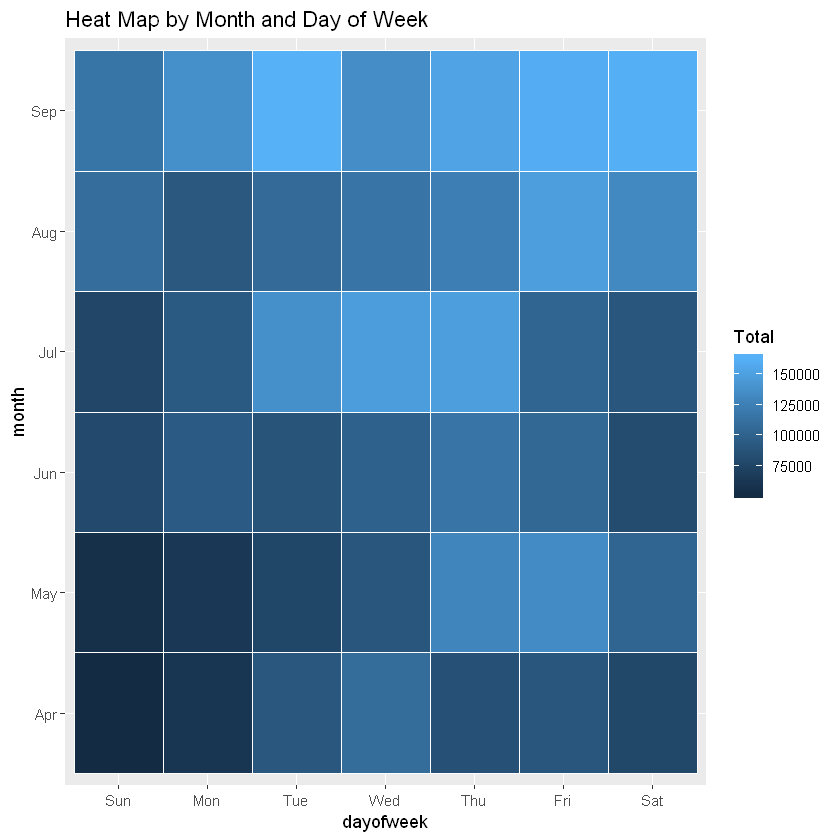

In [40]:
ggplot(month_weekday, aes(dayofweek, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Day of Week")

In [41]:
# 4.  Heatmap that delineates Month and Bases.

`summarise()` has grouped output by 'Base'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Base'. You can override using the `.groups` argument.


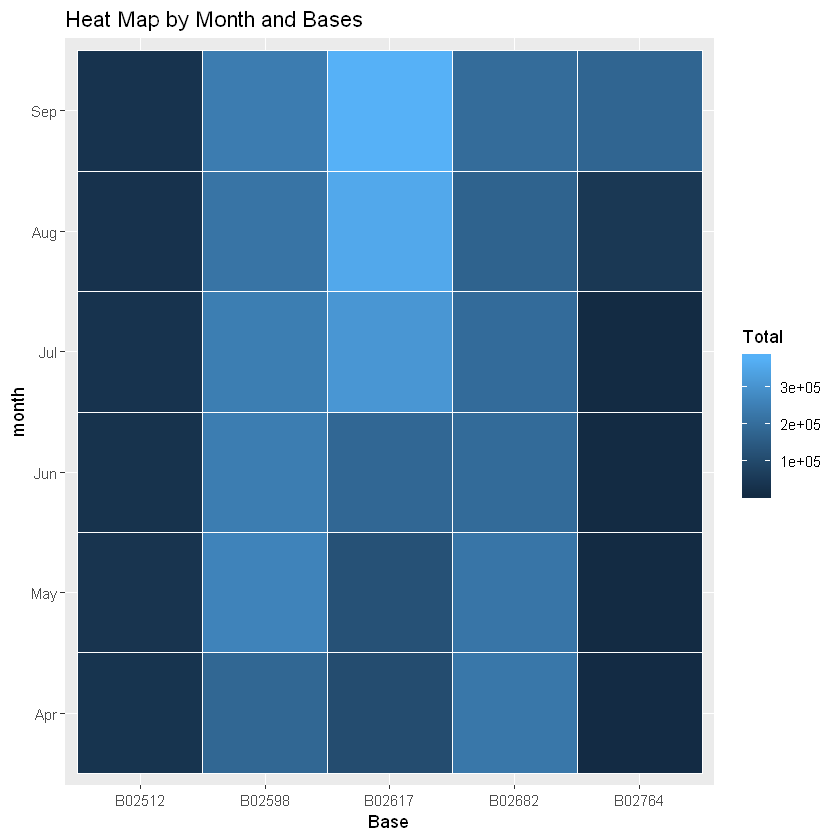

In [42]:
month_base <-  data_2014 %>%
                    group_by(Base, month) %>%
                        dplyr::summarize(Total = n()) 

day0fweek_bases <-  data_2014 %>%
                    group_by(Base, dayofweek) %>%
                        dplyr::summarize(Total = n()) 

ggplot(month_base, aes(Base, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Bases")

In [43]:
# 5. heatmap, by bases and day of the week

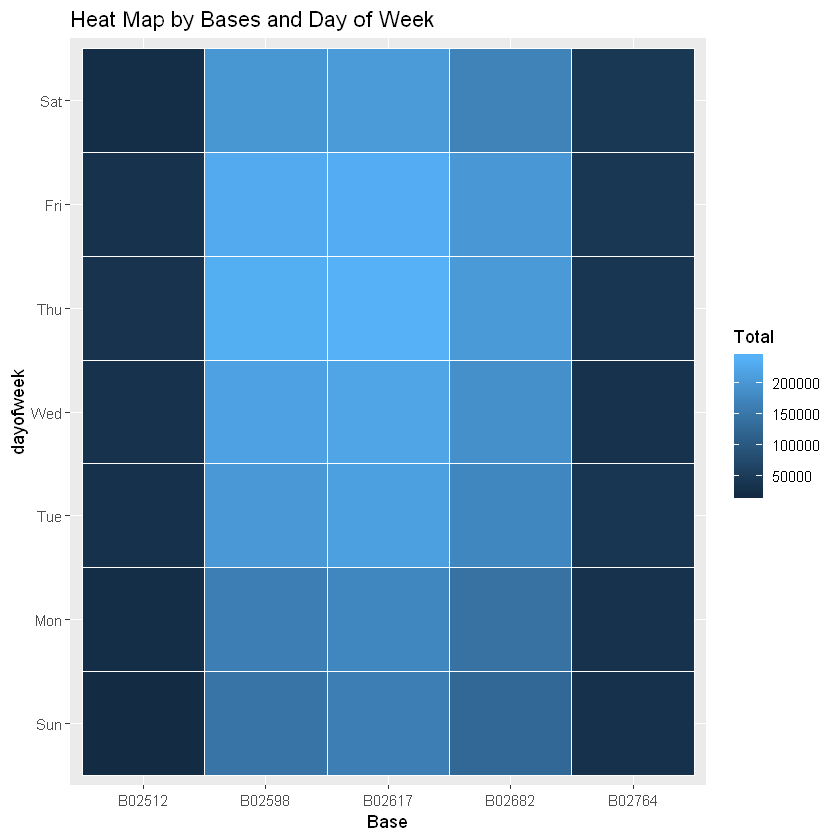

In [44]:
ggplot(day0fweek_bases, aes(Base, dayofweek, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Bases and Day of Week")

In [45]:
## Creating a map visualization of rides in New York

Warning message:
"Removed 71701 rows containing missing values (geom_point)."Warning message:
"Removed 71701 rows containing missing values (geom_point)."

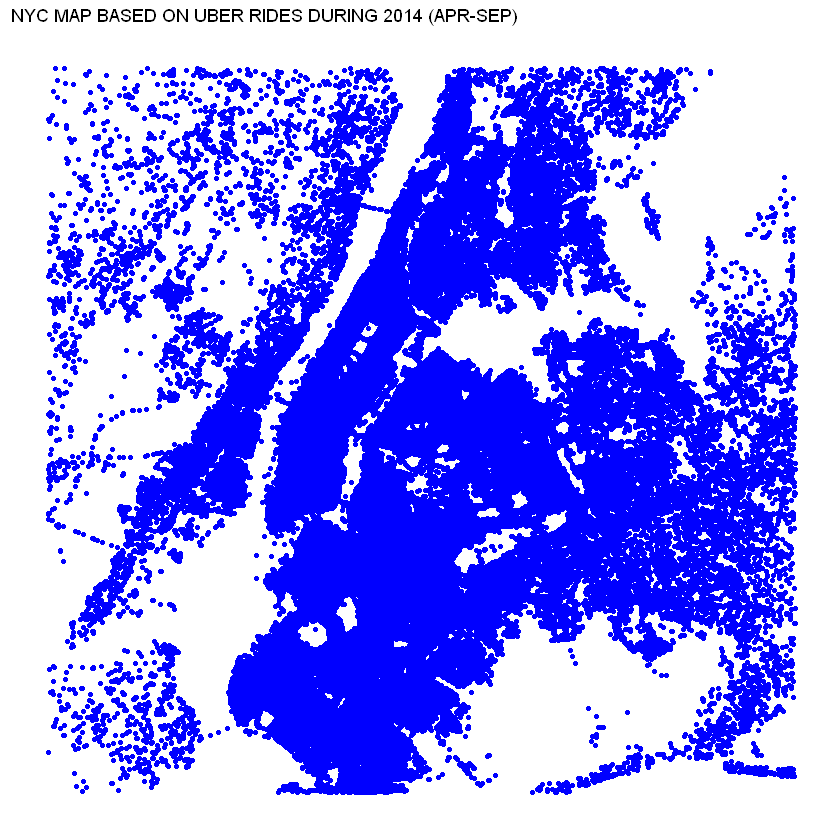

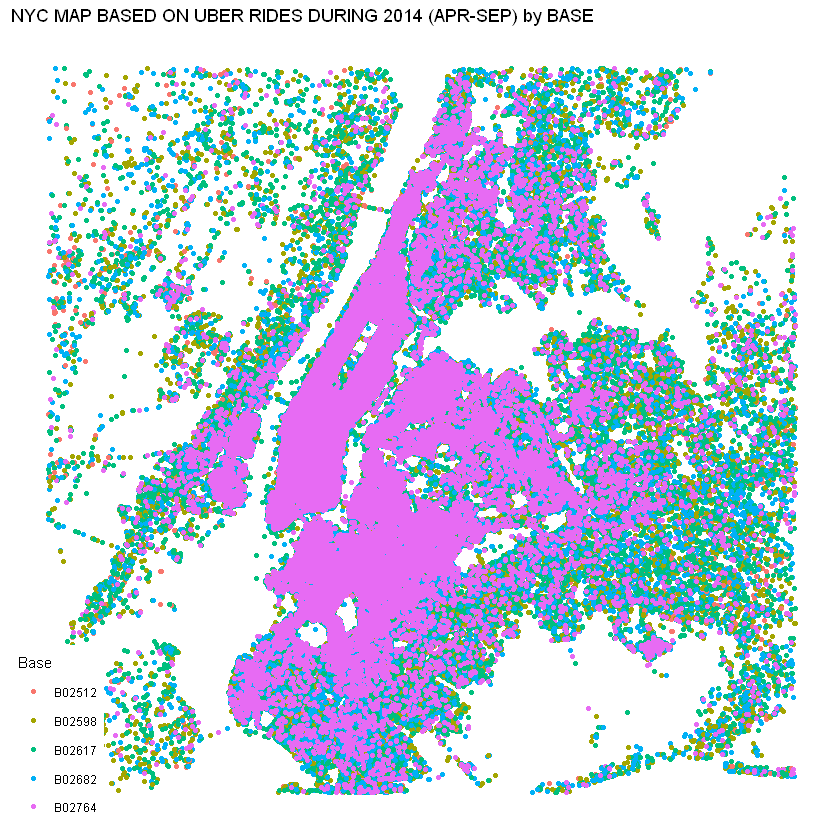

In [46]:
min_lat <- 40.5774
max_lat <- 40.9176
min_long <- -74.15
max_long <- -73.7004

ggplot(data_2014, aes(x=Lon, y=Lat)) +
  geom_point(size=1, color = "blue") +
     scale_x_continuous(limits=c(min_long, max_long)) +
      scale_y_continuous(limits=c(min_lat, max_lat)) +
        theme_map() +
           ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP)")

ggplot(data_2014, aes(x=Lon, y=Lat, color = Base)) +
  geom_point(size=1) +
     scale_x_continuous(limits=c(min_long, max_long)) +
      scale_y_continuous(limits=c(min_lat, max_lat)) +
       theme_map() +
          ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP) by BASE")

In [ ]:
# At the end of the Uber data analysis R project, we observed how to create data visualizations. We made use of packages like ggplot2 that allowed us to plot various types of visualizations that pertained to several time-frames of the year. With this, we could conclude how time affected customer trips. Finally, we made a geo plot of New York that provided us with the details of how various users made trips from different bases.

# K-Means Clustering

In [48]:
set.seed(20)
clusters <- kmeans(data_2014[,2:3], 5)

# Save the cluster number in the dataset as column 'Borough'
data_2014$Borough <- as.factor(clusters$cluster)

In [49]:
# Inspect 'clusters'
str(clusters)

List of 9
 $ cluster     : int [1:4534327] 2 4 4 2 2 4 4 2 4 2 ...
 $ centers     : num [1:5, 1:2] 40.7 40.8 40.7 40.7 40.7 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : chr [1:2] "Lat" "Lon"
 $ totss       : num 22107
 $ withinss    : num [1:5] 471 1650 997 719 3524
 $ tot.withinss: num 7361
 $ betweenss   : num 14746
 $ size        : int [1:5] 45366 1502128 581266 2128911 276656
 $ iter        : int 4
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [58]:
library(ggmap)

NYCMap <- get_map("New York", zoom = 10)
ggmap(NYCMap) + geom_point(aes(x = Lon[], y = Lat[], colour = as.factor(Borough)),data = data14) +
  ggtitle("NYC Boroughs using KMean")

Source : https://maps.googleapis.com/maps/api/staticmap?center=New%20York&zoom=10&size=640x640&scale=2&maptype=terrain&language=en-EN&key=xxx-jFjyAbbVDOTj73W9m1sq6HY
Source : https://maps.googleapis.com/maps/api/geocode/json?address=New+York&key=xxx-jFjyAbbVDOTj73W9m1sq6HY
Warning message:
"Geocoding "New York" failed with error:
This API project is not authorized to use this API.
"

ERROR: Error in (function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE, : arguments imply differing number of rows: 1, 0
